In [20]:
import numpy as np
from numpy.linalg import eig, det
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
sns.set_palette('pastel')
import sympy as sp
from scipy.integrate import odeint
from scipy.optimize import fsolve

### Define Differential Equations

In [93]:
def trp_dynamics(x, t):
    """For simulating trp operon dynamics over time:
    x[0] : mRNA conc
    x[1] : trp conc
    y    : enzyme conc = 0.5*x[0]
    """
    r_m = 75
    alpha_1 = 0.9
    alpha_2 = 0.02
    alpha_3 = 0
    alpha_4 = 0.024
    alpha_5 = 430
    alpha_6 = -0.75
    k = 0.005
    k_a = 5.5
    k_i = 100
    k_r = 25
    u = 0.0002762
    y = 0.5*x[0]
    
    r = r_m * x[1] / (x[1] + k_r)
    dx0_dt = (1 + x[1]) / (1 + (1 + r) * x[1]) * k_a / (k_a + x[1]) - (u + alpha_1) * x[0]
    dx1_dt = y * (k_i**2) / ((k_i**2) + (x[1]**2)) - \
    (u + alpha_3) * x[1] - (alpha_4 * x[1]) / (1 + x[1]) * x[1] / (x[1] + k_r) - \
    alpha_5 * (1 + alpha_6 * u) * u * x[1] / (x[1] + k)
    
    dx_dt = [dx0_dt, dx1_dt]
    return dx_dt

In [94]:
def trp_eqs(x):
    """For finding the fixed points and stability
    x[0] : mRNA conc
    x[1] : trp conc
    y    : enzyme conc = 0.5*x[0]
    """
    r_m = 75
    alpha_1 = 0.9
    alpha_2 = 0.02
    alpha_3 = 0
    alpha_4 = 0.024
    alpha_5 = 430
    alpha_6 = -0.75
    k = 0.005
    k_a = 5.5
    k_i = 100
    k_r = 25
    u = 0.0002762
    y = 0.5*x[0]
    
    r = r_m * x[1] / (x[1] + k_r)
    dx0_dt = (1 + x[1]) / (1 + (1 + r) * x[1]) * k_a / (k_a + x[1]) - (u + alpha_1) * x[0]
    dx1_dt = y * (k_i**2) / ((k_i**2) + (x[1]**2)) - \
    (u + alpha_3) * x[1] - (alpha_4 * x[1]) / (1 + x[1]) * x[1] / (x[1] + k_r) - \
    alpha_5 * (1 + alpha_6 * u) * u * x[1] / (x[1] + k)
    
    dx_dt = [dx0_dt, dx1_dt]
    return dx_dt

### Numerical Integration

In [135]:
x0 = [0.06, 6]
t = np.linspace(0, 5000, 1000)

In [136]:
sol = odeint(trp_dynamics, x0, t)
sol

array([[ 0.06      ,  6.        ],
       [ 0.04371741,  5.4929215 ],
       [ 0.04960726,  4.99050459],
       ..., 
       [ 0.2392991 ,  1.53565275],
       [ 0.2392991 ,  1.53565275],
       [ 0.2392991 ,  1.53565275]])

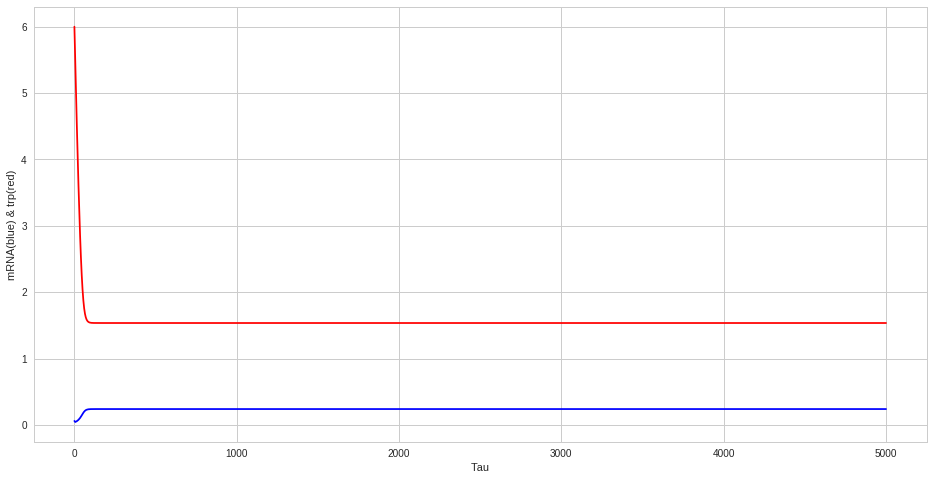

In [137]:
plt.figure(figsize=(16,8))
plt.plot(t, sol[:,0], 'b')
plt.plot(t, sol[:,1], 'r-')
plt.xlabel('Tau')
plt.ylabel('mRNA(blue) & trp(red)')

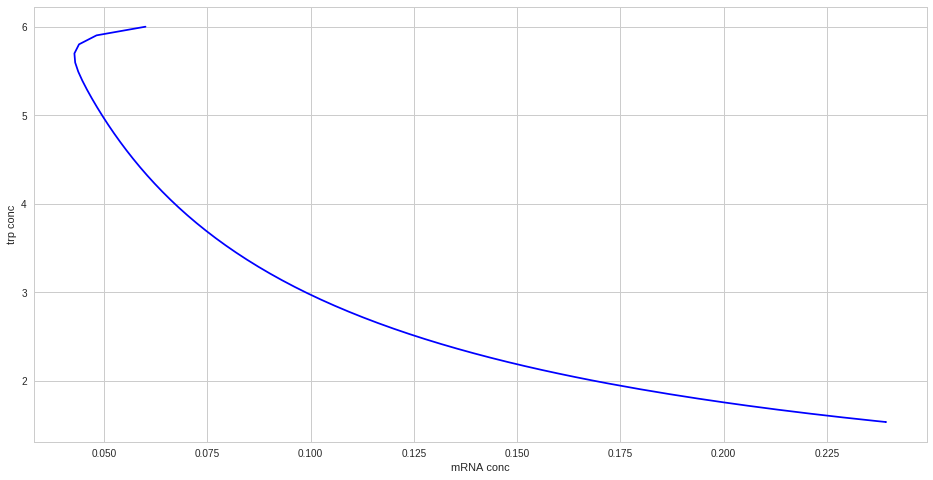

In [129]:
plt.figure(figsize=(16,8))
plt.plot(sol[:,0], sol[:,1], 'b')
plt.xlabel('mRNA conc')
plt.ylabel('trp conc')

### Solve for the Fixed Points
By solving for all DE's = 0 numerically

In [130]:
x_star, y_star =  fsolve(trp_eqs, (1, 1))

In [131]:
print(x_star, y_star)

0.239299103978 1.53565275238


In [132]:
x0 = [x_star, y_star]
t = np.linspace(0, 10, 1000)

In [133]:
sol = odeint(trp_dynamics, x0, t)
sol

array([[ 0.2392991 ,  1.53565275],
       [ 0.2392991 ,  1.53565275],
       [ 0.2392991 ,  1.53565275],
       ..., 
       [ 0.2392991 ,  1.53565275],
       [ 0.2392991 ,  1.53565275],
       [ 0.2392991 ,  1.53565275]])

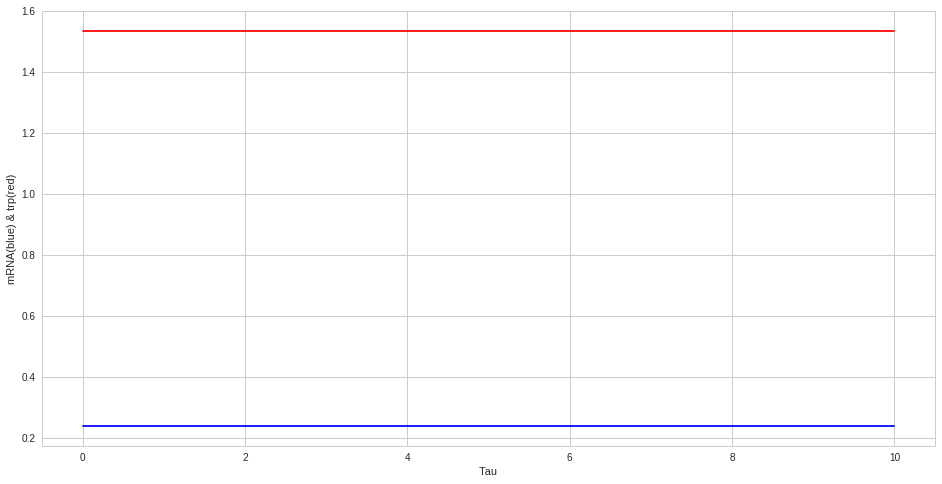

In [134]:
plt.figure(figsize=(16,8))
plt.plot(t, sol[:,0], 'b')
plt.plot(t, sol[:,1], 'r-')
plt.xlabel('Tau')
plt.ylabel('mRNA(blue) & trp(red)')

### Jacobian Matrix

In [112]:
(x, y) = sp.symbols('x, y', real=True)

In [113]:
dx, dy = trp_eqs((x, y))

In [114]:
A = sp.Matrix([dx, dy])

In [115]:
J = A.jacobian([x, y])

In [116]:
J

Matrix([
[           -0.9002762, 5.5*(y + 1)*(-y*(-75*y/(y + 25)**2 + 75/(y + 25)) - 75*y/(y + 25) - 1)/((y + 5.5)*(y*(75*y/(y + 25) + 1) + 1)**2) - 5.5*(y + 1)/((y + 5.5)**2*(y*(75*y/(y + 25) + 1) + 1)) + 5.5/((y + 5.5)*(y*(75*y/(y + 25) + 1) + 1))],
[5000.0/(y**2 + 10000),           -10000.0*x*y/(y**2 + 10000)**2 + 0.024*y**2/((y + 1)*(y + 25)**2) + 0.024*y**2/((y + 1)**2*(y + 25)) - 0.048*y/((y + 1)*(y + 25)) + 0.1187413976231*y/(y + 0.005)**2 - 0.0002762 - 0.1187413976231/(y + 0.005)]])

In [117]:
J_atFP = J.subs([(x, x_star), (y, y_star)])
J_atFP

Matrix([
[       -0.9002762,   -0.166445769198849],
[0.499882116330879, -0.00129513313149464]])

### Evaluating Stability

In [118]:
trace = J_atFP.trace()
trace

-0.901571333131495

In [119]:
determinant = J_atFP.det()
determinant

0.0843692408955576

In [120]:
eigens = J_atFP.eigenvects()

In [121]:
eigens # ==> eigenvalues, multiplicity, eigenvector

[(-0.795515236352801, 1, [Matrix([
   [-1.58881479707828],
   [              1.0]])]), (-0.106056096778693, 1, [Matrix([
   [-0.209571337370781],
   [               1.0]])])]